In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

In [9]:
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [10]:
percentage = 0.6
series = dta['SUNACTIVITY'].tolist()
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]

In [11]:
window_size = 8
def make_model(window_size):
    model = Sequential()
    model.add(Dense(8, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(4, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#def make_lstm_model():
#   model = Sequential()
#   model.add(LSTM(
#        input_dim=1,
#        output_dim=50,
#        return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(
#        100,
#        return_sequences=False))
#   model.add(Dropout(0.2))

#   model.add(Dense(
#        output_dim=1))
#   model.add(Activation("linear"))
#   model.compile(loss="mse", optimizer="rmsprop")
#   return model

model = make_model(8)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(train) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=2000, batch_size=512, validation_split = .05)

Train on 185 samples, validate on 10 samples
Epoch 1/2000
185/185 [==============================] - 0s - loss: 0.1374 - val_loss: 0.0860
Epoch 2/2000
185/185 [==============================] - 0s - loss: 0.1350 - val_loss: 0.0843
Epoch 3/2000
185/185 [==============================] - 0s - loss: 0.1327 - val_loss: 0.0825
Epoch 4/2000
185/185 [==============================] - 0s - loss: 0.1304 - val_loss: 0.0808
Epoch 5/2000
185/185 [==============================] - 0s - loss: 0.1281 - val_loss: 0.0791
Epoch 6/2000
185/185 [==============================] - 0s - loss: 0.1258 - val_loss: 0.0774
Epoch 7/2000
185/185 [==============================] - 0s - loss: 0.1236 - val_loss: 0.0758
Epoch 8/2000
185/185 [==============================] - 0s - loss: 0.1213 - val_loss: 0.0741
Epoch 9/2000
185/185 [==============================] - 0s - loss: 0.1190 - val_loss: 0.0724
Epoch 10/2000
185/185 [==============================] - 0s - loss: 0.1167 - val_loss: 0.0708
Epoch 11/2000
185/185 [=

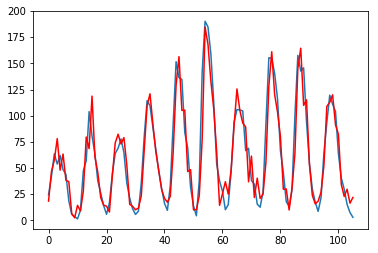

Test MSE: 284.106


In [12]:
test_extended = train.tolist()[-1*window_size:] + test
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_test_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(test)
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test,predictions_rescaled)
print('Test MSE: %.3f' % error)

In [12]:
len(train)

203

In [13]:
new_train_X


array([[ 0.03238342,  0.07124352,  0.10362694, ...,  0.37564767,
         0.18782383,  0.12953368],
       [ 0.07124352,  0.10362694,  0.14896373, ...,  0.18782383,
         0.12953368,  0.06476684],
       [ 0.10362694,  0.14896373,  0.23316062, ...,  0.12953368,
         0.06476684,  0.05181347],
       ..., 
       [ 0.47279793,  0.5511658 ,  0.50518135, ...,  0.16968912,
         0.17292746,  0.07836788],
       [ 0.5511658 ,  0.50518135,  0.41450777, ...,  0.17292746,
         0.07836788,  0.0615285 ],
       [ 0.50518135,  0.41450777,  0.27072539, ...,  0.07836788,
         0.0615285 ,  0.01748705]])